In [11]:
import numpy as np
import matplotlib.pyplot as plt

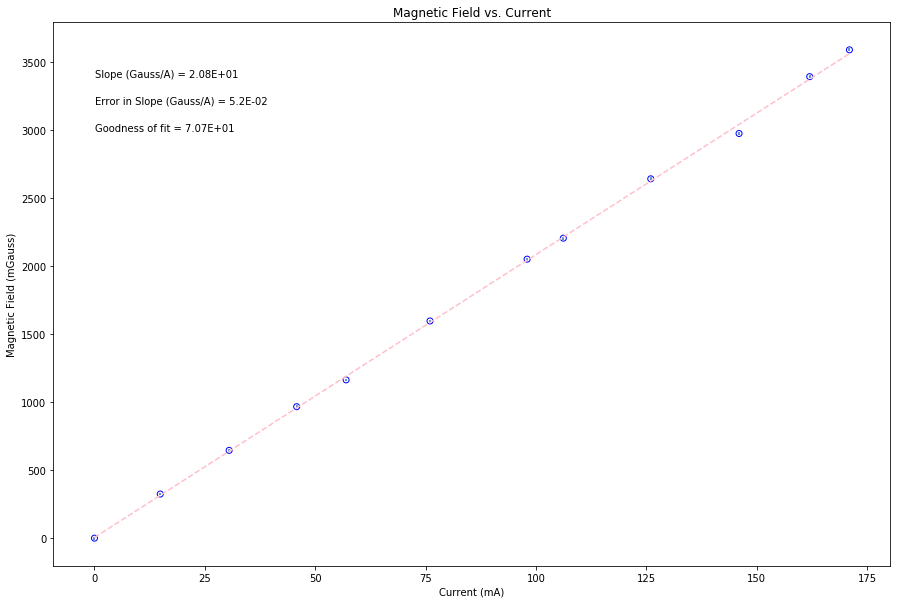

In [13]:
xvariable_A = np.array([0, 14.9, 30.5, 45.8, 57.0, 76.0, 98.0, 106.2, 126.0, 146.0, 162.0, 171.0])
yvariable_Gauss = np.array([0, 324.38, 645.57, 966.75, 1163.70, 1596.99, 2051.49, 2206.02, 2642.34, 2975.64, 3393.78, 3590.73]) 

err_yvariable_Gauss = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])


x = xvariable_A
y = yvariable_Gauss
dy = err_yvariable_Gauss


b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) 
db = np.sqrt(1/D*sum(x**2/dy**2)) 

def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)


plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='pink', linestyle='--')
plt.scatter(x, y, color='blue', marker='o', facecolor='none')

plt.xlabel('Current (mA)')
plt.ylabel('Magnetic Field (mGauss)')
plt.title('Magnetic Field vs. Current')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")
 
plt.annotate('Slope (Gauss/A) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Gauss/A) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
